## Проект спринт 12
**Название проекта**:  
Цифра     
_____
**Описание исследования**:  
Построение модели предсказания коэффициента восстановления золота из золотосодержащей руды на основании данных с параметрами добычи и очистки.  
_____
**Цель исследования**:  
Оптимизация производства, чтобы не запускать предприятие с убыточными характеристиками.
_____
**План исследования.**  
[Шаг 1. Загрузка и подготовка данных](#step1)  
[Шаг 2. Анализ данных](#step2)  
[Шаг 3. Построение модели](#step3)  
_____
**Исходные данные.**
Исходные файлы, содержащие данные геологоразведки трёх регионов:  
- [gold_recovery_full_new.csv](gold_recovery_full_new.csv) - полные исходные данные
- [gold_recovery_test_new.csv](gold_recovery_test_new.csv) - валидационная выборка
- [gold_recovery_train_new.csv](gold_recovery_train_new.csv) - обучающая выборка   


1. Подготовьте данные
1.1. Откройте файлы и изучите их.
Путь к файлам:
/datasets/gold_recovery_train_new.csv. Скачать датасет
/datasets/gold_recovery_test_new.csv. Скачать датасет
/datasets/gold_recovery_full_new.csv. Скачать датасет
1.2. Проверьте, что эффективность обогащения рассчитана правильно. Вычислите её на обучающей выборке для признака rougher.output.recovery. Найдите MAE между вашими расчётами и значением признака. Опишите выводы.
1.3. Проанализируйте признаки, недоступные в тестовой выборке. Что это за параметры? К какому типу относятся?
1.4. Проведите предобработку данных.
2. Проанализируйте данные
2.1. Посмотрите, как меняется концентрация металлов (Au, Ag, Pb) на различных этапах очистки. Опишите выводы.
2.2.  Сравните распределения размеров гранул сырья на обучающей и тестовой выборках. Если распределения сильно отличаются друг от друга, оценка модели будет неправильной.
2.3. Исследуйте суммарную концентрацию всех веществ на разных стадиях: в сырье, в черновом и финальном концентратах. 
3. Постройте модель
3.1. Напишите функцию для вычисления итоговой sMAPE.
3.2. Обучите разные модели и оцените их качество кросс-валидацией. Выберите лучшую модель и проверьте её на тестовой выборке. Опишите выводы.

<a id='step1'></a>
## Шаг 1. Загрузка и подготовка данных

In [46]:
# загружаем нужные библиотеки
import pandas as pd
from sklearn.metrics import mean_absolute_error as mae
import seaborn as sns
from matplotlib import pyplot as plt

### Откроем файлы и изучим их

In [19]:
full = pd.read_csv('gold_recovery_full_new.csv')
test = pd.read_csv('gold_recovery_test_new.csv')
train = pd.read_csv('gold_recovery_train_new.csv')
print(full.shape)
print(train.shape)
print(test.shape)

(19439, 87)
(14149, 87)
(5290, 53)


в тестовом датасете меньше фичей, чем в полной и обучающих выборках

In [8]:
display(train.sample(2))

,date,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.concentrate_au,final.output.recovery,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol,final.output.tail_au,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
4741,2017-01-03 11:59:59,5.125968,6.191207,13.903351,48.073044,68.900956,10.301819,1.696939,12.294323,2.364444,...,17.008550,-502.101407,15.022126,-503.060621,16.113305,-500.999007,7.979079,-500.239685,20.001377,-601.182944
11713,2018-04-20 00:59:59,5.816174,7.702905,7.682277,48.110914,61.347281,12.149815,2.189581,3.582011,2.676565,...,26.978521,-500.178566,19.879030,-501.079737,20.037101,-499.588063,14.987330,-499.958277,15.006860,-499.291166


In [4]:
print(train.columns)

Index(['date', 'final.output.concentrate_ag', 'final.output.concentrate_pb',
       'final.output.concentrate_sol', 'final.output.concentrate_au',
       'final.output.recovery', 'final.output.tail_ag', 'final.output.tail_pb',
       'final.output.tail_sol', 'final.output.tail_au',
       'primary_cleaner.input.sulfate', 'primary_cleaner.input.depressant',
       'primary_cleaner.input.feed_size', 'primary_cleaner.input.xanthate',
       'primary_cleaner.output.concentrate_ag',
       'primary_cleaner.output.concentrate_pb',
       'primary_cleaner.output.concentrate_sol',
       'primary_cleaner.output.concentrate_au',
       'primary_cleaner.output.tail_ag', 'primary_cleaner.output.tail_pb',
       'primary_cleaner.output.tail_sol', 'primary_cleaner.output.tail_au',
       'primary_cleaner.state.floatbank8_a_air',
       'primary_cleaner.state.floatbank8_a_level',
       'primary_cleaner.state.floatbank8_b_air',
       'primary_cleaner.state.floatbank8_b_level',
       'primary_clean

### Проверим, что эффективность обогащения рассчитана правильно

In [17]:
# C (F - T)
# F (C - T)
# C - Au after
# F - Au before
# T - Au in tails
train['rougher.output.recovery_calc'] = 100.0 * train['rougher.output.concentrate_au'] * (train['rougher.input.feed_au'] - train['rougher.output.tail_au']) / (train['rougher.input.feed_au'] * (train['rougher.output.concentrate_au'] - train['rougher.output.tail_au']))
m = mae(train['rougher.output.recovery'], train['rougher.output.recovery_calc'])
print(m)

1.1498046842860452e-14


на тестовой выборке разница MAE между рассчитанным уровнем обогащения и из данных ничтожно мал, можно рассчитывать на исходные данные

### Проанализируем признаки, недоступные в тестовой выборке

In [26]:
test_columns = set(test.columns)
train_columns = set(train.columns)
diff = list(sorted(train_columns - test_columns))
diff

['final.output.concentrate_ag',
 'final.output.concentrate_au',
 'final.output.concentrate_pb',
 'final.output.concentrate_sol',
 'final.output.recovery',
 'final.output.tail_ag',
 'final.output.tail_au',
 'final.output.tail_pb',
 'final.output.tail_sol',
 'primary_cleaner.output.concentrate_ag',
 'primary_cleaner.output.concentrate_au',
 'primary_cleaner.output.concentrate_pb',
 'primary_cleaner.output.concentrate_sol',
 'primary_cleaner.output.tail_ag',
 'primary_cleaner.output.tail_au',
 'primary_cleaner.output.tail_pb',
 'primary_cleaner.output.tail_sol',
 'rougher.calculation.au_pb_ratio',
 'rougher.calculation.floatbank10_sulfate_to_au_feed',
 'rougher.calculation.floatbank11_sulfate_to_au_feed',
 'rougher.calculation.sulfate_to_au_concentrate',
 'rougher.output.concentrate_ag',
 'rougher.output.concentrate_au',
 'rougher.output.concentrate_pb',
 'rougher.output.concentrate_sol',
 'rougher.output.recovery',
 'rougher.output.tail_ag',
 'rougher.output.tail_au',
 'rougher.output.ta

In [28]:
display(train[diff].info())
display(train[diff].sample(10))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14149 entries, 0 to 14148
Data columns (total 34 columns):
 #   Column                                              Non-Null Count  Dtype  
---  ------                                              --------------  -----  
 0   final.output.concentrate_ag                         14148 non-null  float64
 1   final.output.concentrate_au                         14149 non-null  float64
 2   final.output.concentrate_pb                         14148 non-null  float64
 3   final.output.concentrate_sol                        13938 non-null  float64
 4   final.output.recovery                               14149 non-null  float64
 5   final.output.tail_ag                                14149 non-null  float64
 6   final.output.tail_au                                14149 non-null  float64
 7   final.output.tail_pb                                14049 non-null  float64
 8   final.output.tail_sol                               14144 non-null  float64


None

,final.output.concentrate_ag,final.output.concentrate_au,final.output.concentrate_pb,final.output.concentrate_sol,final.output.recovery,final.output.tail_ag,final.output.tail_au,final.output.tail_pb,final.output.tail_sol,primary_cleaner.output.concentrate_ag,...,rougher.output.concentrate_sol,rougher.output.recovery,rougher.output.tail_ag,rougher.output.tail_au,rougher.output.tail_pb,rougher.output.tail_sol,secondary_cleaner.output.tail_ag,secondary_cleaner.output.tail_au,secondary_cleaner.output.tail_pb,secondary_cleaner.output.tail_sol
12831,4.353331,43.706865,12.835291,5.945363,69.194895,8.990429,2.010758,2.550146,8.871839,7.321768,...,29.999874,85.849883,4.315680,1.161679,0.346977,17.646970,16.636522,3.274162,10.908950,NaN
1471,4.107938,45.389809,10.923634,4.856681,63.846890,10.895997,3.542992,2.023411,18.501445,6.268826,...,24.594967,74.487635,6.963715,3.268393,1.332875,18.436623,14.514897,2.694367,5.046386,10.542642
2644,2.847072,49.415067,8.030415,9.768128,58.408949,6.154908,3.143842,1.946131,14.352148,6.230655,...,33.638913,69.766243,5.582590,2.672479,1.336151,19.689575,13.470562,3.633330,4.381288,12.255152
2979,4.355085,45.470087,10.800413,8.274844,71.022884,7.594325,2.343099,1.278417,10.605441,7.452982,...,29.725466,76.491462,6.098019,2.266983,0.720186,16.563672,7.901120,2.302444,2.143406,5.533355
1312,4.599634,45.738646,9.406711,2.363399,67.029634,10.861740,2.977467,2.109091,18.580949,8.172482,...,25.964103,81.411698,5.949279,2.221339,0.913997,16.393505,9.503273,2.492071,4.069037,8.537763
13154,4.732731,47.042857,8.624968,6.816197,76.114214,11.638184,2.955857,2.627456,4.004565,2.036869,...,33.097636,87.505032,5.526059,2.211341,0.356589,10.551506,17.132610,4.337125,8.796590,NaN
6219,7.156457,43.808878,9.333051,12.515708,100.000000,0.000000,0.000000,0.000000,0.000000,11.432881,...,31.536242,90.139687,6.925067,2.109208,0.605824,15.588324,15.928044,3.743253,4.109060,11.682132
13755,3.857385,46.200735,8.797366,9.641099,74.948711,12.412522,2.761055,2.459872,11.141096,10.823445,...,31.406170,86.908989,6.119694,2.002175,0.940826,20.515547,19.727816,5.429529,7.185268,6.042519
7842,0.981225,10.612920,2.385123,1.763048,74.879638,8.628010,3.390567,3.266748,8.951359,7.557952,...,34.759427,77.591669,6.194592,2.023674,0.591140,16.472838,14.751930,9.943732,9.959909,2.338133
7697,5.560795,40.601863,12.422922,7.453114,33.694318,8.642642,6.708525,4.434050,10.479611,7.210346,...,32.878345,80.898586,6.341167,2.826864,1.026241,13.364128,12.622366,20.512631,9.801745,4.590415


в тестовой выборке отсутствуют почти все данные о выходе и хвостах на всех этапах процесса очистки (кроме выхода из вторичной очистки, которая есть)  
также отсутствуют некоторые расчетные данные: `rougher.calculation.au_pb_ratio`, `rougher.calculation.floatbank10_sulfate_to_au_feed`, `rougher.calculation.floatbank11_sulfate_to_au_feed`, `rougher.calculation.sulfate_to_au_concentrate`

### проведем предобработку данных

In [30]:
# уберем из train поля, которых нет в test
train.drop(diff, axis='columns', inplace=True)

In [31]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14149 entries, 0 to 14148
Data columns (total 53 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   date                                        14149 non-null  object 
 1   primary_cleaner.input.sulfate               14129 non-null  float64
 2   primary_cleaner.input.depressant            14117 non-null  float64
 3   primary_cleaner.input.feed_size             14149 non-null  float64
 4   primary_cleaner.input.xanthate              14049 non-null  float64
 5   primary_cleaner.state.floatbank8_a_air      14145 non-null  float64
 6   primary_cleaner.state.floatbank8_a_level    14148 non-null  float64
 7   primary_cleaner.state.floatbank8_b_air      14145 non-null  float64
 8   primary_cleaner.state.floatbank8_b_level    14148 non-null  float64
 9   primary_cleaner.state.floatbank8_c_air      14147 non-null  float64
 10  primary_cl

In [32]:
train.sample(10)

,date,primary_cleaner.input.sulfate,primary_cleaner.input.depressant,primary_cleaner.input.feed_size,primary_cleaner.input.xanthate,primary_cleaner.state.floatbank8_a_air,primary_cleaner.state.floatbank8_a_level,primary_cleaner.state.floatbank8_b_air,primary_cleaner.state.floatbank8_b_level,primary_cleaner.state.floatbank8_c_air,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
587,2016-02-10 23:00:00,112.087579,11.997720,8.400,1.326702,1600.383271,-347.806867,1598.780434,-349.894715,1597.668971,...,21.970322,-400.933341,17.929461,-400.179670,20.000625,-399.292883,18.012676,-399.711080,26.974266,-400.138280
11706,2018-04-19 17:59:59,116.004575,11.988382,6.870,1.110534,1508.155865,-499.683863,1621.363593,-500.932958,1698.637138,...,27.024309,-509.451574,20.086613,-407.183862,17.964186,-500.328548,10.257683,-500.154879,14.980398,-501.853605
2512,2016-05-24 07:59:59,153.447136,17.790660,8.600,0.717804,1099.835719,-500.088011,1098.956590,-500.224164,1100.331138,...,10.008680,-500.616003,7.968102,-499.768869,7.879991,-498.839136,6.030846,-500.091739,18.026332,-500.238335
13433,2018-07-09 14:59:59,124.527733,6.106464,8.210,1.086265,1450.146046,-498.150132,1449.510724,-500.063554,1451.808314,...,25.016099,-500.184859,20.079892,-482.267648,17.994933,-499.733503,13.015745,-499.809672,12.987491,-499.716428
8821,2017-07-20 23:59:59,125.964030,5.888599,7.120,0.335701,1698.970290,-499.937294,1543.719152,-500.126667,1701.412291,...,22.058704,-500.103220,14.957411,-380.929727,18.035213,-500.462937,13.028359,-500.029428,15.010114,-500.002635
5134,2017-01-26 04:59:59,128.586815,9.967986,7.420,0.607068,1599.814968,-500.042662,1602.291477,-499.614741,1603.559672,...,21.011573,-497.402110,20.975932,-500.250937,23.024898,-498.946235,19.996519,-500.163272,24.996915,-600.005667
1571,2016-03-27 04:00:00,93.934927,11.973137,7.770,0.852010,1599.518705,-402.484334,1599.495770,-398.596775,1602.611809,...,12.014252,-499.790414,12.010451,-500.320650,12.027906,-500.199293,10.046739,-500.216446,20.056149,-500.156444
3735,2016-07-21 02:59:59,171.477007,10.014012,7.712,0.891718,1597.742767,-499.641033,1598.281026,-499.982543,1601.944736,...,15.007354,-399.673871,4.915295,-399.499134,10.026357,-398.973432,4.982969,-400.364115,22.966286,-499.338210
13563,2018-07-15 03:59:59,148.531574,8.026867,6.420,0.998256,1452.267406,-499.654004,1450.404476,-500.084164,1450.119619,...,16.908229,-500.270328,14.923589,-499.893962,11.017706,-499.694243,10.033284,-499.797841,12.985045,-499.726156
797,2016-02-20 15:00:00,206.582963,15.982957,7.360,1.699804,1501.060471,-399.441342,1500.204632,-399.430771,1501.077269,...,12.065210,-400.684311,10.054231,-400.302314,10.076714,-400.433922,8.060670,-400.107821,20.015001,-400.976990


In [35]:
train['date'] = pd.to_datetime(train.date, format='%Y-%m-%d %H:%M:%S')

In [37]:
train.dropna(inplace=True)

In [38]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12679 entries, 0 to 14148
Data columns (total 53 columns):
 #   Column                                      Non-Null Count  Dtype         
---  ------                                      --------------  -----         
 0   date                                        12679 non-null  datetime64[ns]
 1   primary_cleaner.input.sulfate               12679 non-null  float64       
 2   primary_cleaner.input.depressant            12679 non-null  float64       
 3   primary_cleaner.input.feed_size             12679 non-null  float64       
 4   primary_cleaner.input.xanthate              12679 non-null  float64       
 5   primary_cleaner.state.floatbank8_a_air      12679 non-null  float64       
 6   primary_cleaner.state.floatbank8_a_level    12679 non-null  float64       
 7   primary_cleaner.state.floatbank8_b_air      12679 non-null  float64       
 8   primary_cleaner.state.floatbank8_b_level    12679 non-null  float64       
 9   primar

<a id='step2'></a>
## Шаг 2. Анализ данных

### Посмотрим, как меняется концентрация металлов (Au, Ag, Pb) на различных этапах очистки

In [39]:
full.columns

Index(['date', 'final.output.concentrate_ag', 'final.output.concentrate_pb',
       'final.output.concentrate_sol', 'final.output.concentrate_au',
       'final.output.recovery', 'final.output.tail_ag', 'final.output.tail_pb',
       'final.output.tail_sol', 'final.output.tail_au',
       'primary_cleaner.input.sulfate', 'primary_cleaner.input.depressant',
       'primary_cleaner.input.feed_size', 'primary_cleaner.input.xanthate',
       'primary_cleaner.output.concentrate_ag',
       'primary_cleaner.output.concentrate_pb',
       'primary_cleaner.output.concentrate_sol',
       'primary_cleaner.output.concentrate_au',
       'primary_cleaner.output.tail_ag', 'primary_cleaner.output.tail_pb',
       'primary_cleaner.output.tail_sol', 'primary_cleaner.output.tail_au',
       'primary_cleaner.state.floatbank8_a_air',
       'primary_cleaner.state.floatbank8_a_level',
       'primary_cleaner.state.floatbank8_b_air',
       'primary_cleaner.state.floatbank8_b_level',
       'primary_clean

In [54]:
metals = ['au', 'ag', 'pb']
prefix_states = ['rougher.input.feed_', 'rougher.output.concentrate_', 'primary_cleaner.output.concentrate_', 'final.output.concentrate_']
axis_states = ['в исходном сырье', 'после флотации', 'после первичной очистки', 'в финальном концентрате']

AU


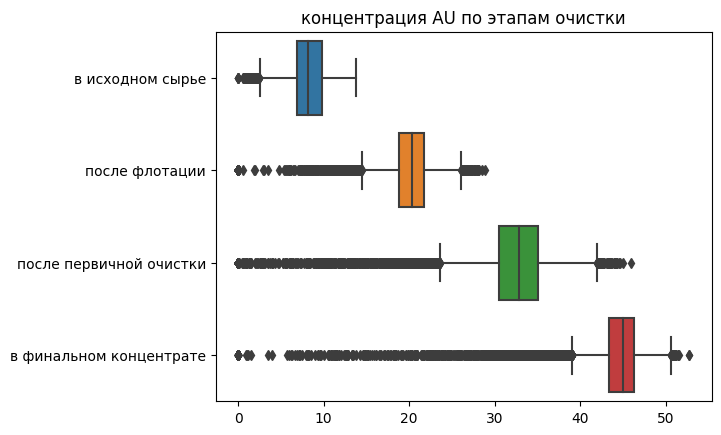

AG


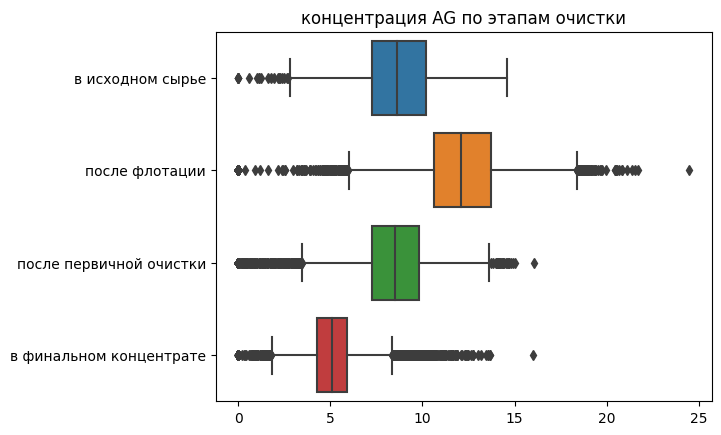

PB


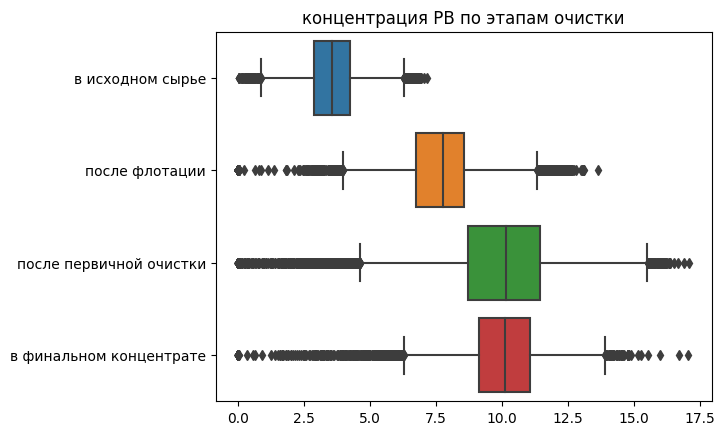

In [57]:
for metal in metals:
    p = []
    for i in range(len(prefix_states)):
        p.append(prefix_states[i] + metal)
    print(metal.upper())
    fig, ax = plt.subplots()
    _ = sns.boxplot(data=full[p], orient='h')
    ax.set_yticklabels(axis_states)
    plt.title(label=f'концентрация {metal.upper()} по этапам очистки')
    plt.show()

Концентрация золота в ходе процесса очистки стабильно растет, начиная с 10% до 50%  
Концентрация серебра вырастает пос ле флотации с 9% до 13%, затем падает до 5% после финального жтапа очистки  
Концентрпция свинца растет с 3% до 10% после первичной очистки и остается на этом уровне в финальном концентрате

### Сравним распределения размеров гранул сырья на обучающей и тестовой выборках

In [60]:
train['rougher.input.feed_size'].describe()

count    12679.000000
mean        58.414412
std         20.441275
min          9.659576
25%         48.721041
50%         54.651129
75%         63.719220
max        484.967466
Name: rougher.input.feed_size, dtype: float64

In [61]:
test['rougher.input.feed_size'].describe()

count    5289.000000
mean       55.951097
std        19.081758
min         0.046369
25%        43.906347
50%        50.841029
75%        62.431047
max       392.494040
Name: rougher.input.feed_size, dtype: float64

<AxesSubplot:>

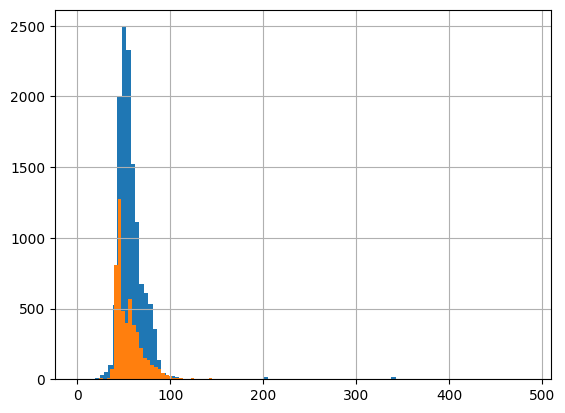

In [64]:
train['rougher.input.feed_size'].hist(bins=100)
test['rougher.input.feed_size'].hist(bins=100)

распределение размера гранул можно считать одинаковыми на обучающей и тестовой выборках

### Исследуем суммарную концентрацию всех веществ на разных стадиях

In [73]:
rougher_feed = ['rougher.input.feed_ag', 'rougher.input.feed_pb', 'rougher.input.feed_sol', 'rougher.input.feed_au']
rougher_au = ['rougher.output.concentrate_ag', 'rougher.output.concentrate_pb', 'rougher.output.concentrate_sol', 'rougher.output.concentrate_au']
final_au = ['final.output.concentrate_ag', 'final.output.concentrate_pb', 'final.output.concentrate_sol', 'final.output.concentrate_au']

full['rougher_feed'] = full[rougher_feed].sum(axis=1)
full['rougher_au'] = full[rougher_au].sum(axis=1)
full['final_au'] = full[final_au].sum(axis=1)

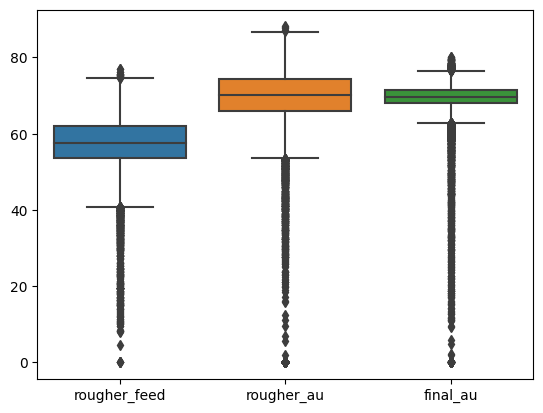

In [74]:
_ = sns.boxplot(data=full[['rougher_feed', 'rougher_au', 'final_au']])

после первичной очистки концентрация металлов в среднем повышается с 60% до 70%, при этом разброс значений достаточно велик  
после финальной очистки концентрация в среднем уже не повышается, но значительно снижается разброс цифр

<a id='step3'></a>
## Шаг 3. Построение модели

функция для вычисления итоговой sMAPE

In [75]:
def sMAPE(y_true, y_pred):
    sum = 0.0
    n = len(y_true)
    for i in range(n):
        sum += 2.0 * abs(y_true[i] - y_pred[i]) / (abs(y_true[i]) + abs(y_pred[i]))
    return sum / n

In [79]:
actual = [12, 13, 14, 15, 15,22, 27]
forecast = [11, 13, 14, 14, 15, 16, 18]

#calculate SMAPE
sMAPE(actual, forecast)

0.12453021609496004